linear kernel accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        99
           1       0.71      0.53      0.60        55

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154

rbf kernel accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        99
           1       0.72      0.47      0.57        55

    accuracy                           0.75       154
   macro avg       0.74      0.69      0.70       154
weighted avg       0.74      0.75      0.73       154



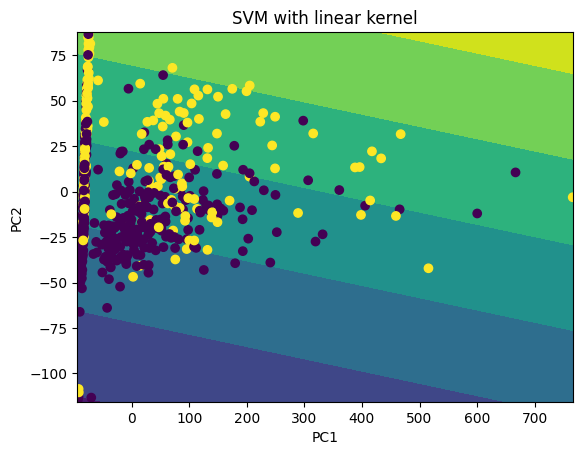

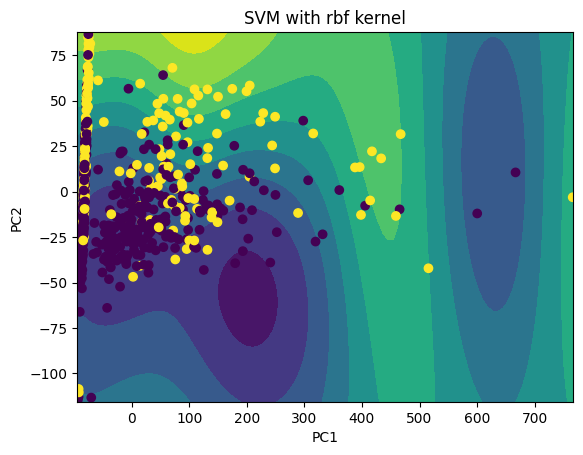

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report

# 1) Point pandas at the raw CSV on GitHub:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
df = pd.read_csv(url)
# 2) Split into X/y
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4) PCA to 2D for plotting
pca = PCA(n_components=2).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca  = pca.transform(X_test)

# 5) Fit & plot both SVMs in a loop
for kernel in ("linear","rbf"):
    model = SVC(kernel=kernel).fit(X_train_pca, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(model, X_train_pca)
    disp.ax_.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train)
    disp.ax_.set_title(f"SVM with {kernel} kernel")
    disp.ax_.set_xlabel("PC1"); disp.ax_.set_ylabel("PC2")
    disp.figure_.show()

    # 6) Test accuracy
    y_pred = model.predict(X_test_pca)
    print(f"{kernel} kernel accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
